# Data Structures and Processing

## Week 10: Time Series

### Remarks:

1. Install the libraries listed below using your package manager.  An example of installing the library `numpy` is to issue a the following command on a terminal (in Ubuntu) `python3 -m pip install numpy`.

2. Make sure that you are following the conventions.  For examples, `import numpy as np`, which imports `numpy` packages and sets the abbreviation for it.

3. Do not import the packages without the short names, unless it is intentional.  Doing so might lead to a namespace conflict, or unintended uses of functions coming from two libraries as a part of different implementations.

4. We are assigning `None` to variables and use `pass` in the body of the functions, where we expect a solution from you.  Please replace these values and statements with your solution.

The exercises in this notebook are aligned with the material provided for the lecture.

### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dtime

## Task 1

Consider a file `IBM.csv` attached to this notebook, which contains stocks since 2000 of IBM.  Import the data from the file as a pandas `DataFrame` into a variable `ts1`.  Since there is no mentioning of index, therefore, the default integer incremented index is associated.  Notice that one of the column is named `"Date"`.  We would like to use this as an index for `df1`.

Your task is to use pandas builtin function to change the index of the above `DataFrame` named `df1`.

In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
ts1 = pd.read_csv("IBM.csv")

# Set the 'Date' column as the index
ts1.set_index('Date', inplace=True)


## Task 2

Reconsider the `DataFrame` named `df1` from Task 1 above.

Your task is to write down a function `average_until_months_end` that takes three arguments:

1. `df` a pandas `DataFrame` (for example, `df1`, as defined above)
2. `ts` a string containing a timestamp.
3. `col` as a column name.

and it returns the mean value along the column `col` with the range of time starting from the timestamp `ts` until the end of the month.


In [3]:
import pandas as pd

def average_until_months_end(df, ts, col):
    # Convert timestamp to datetime object
    ts = pd.to_datetime(ts)
    
    # Filter DataFrame from the timestamp until the end of the month
    end_of_month = pd.to_datetime(ts) + pd.offsets.MonthEnd(0)
    filtered_df = df.loc[ts:end_of_month]
    
    # Calculate the mean along the specified column
    mean_value = filtered_df[col].mean()
    
    return mean_value

## Task 3

Write down a function `change_in_month` that takes three arguments:

1. `df`, the `DataFrame`,
2. `"col"`, the column name for consideration,
3. `"date"`, date as a string of the form "YYYY-mm-dd" or "YYYY/mm/dd".

that returns the difference of the values at the beginning and at the end of a particular month.

In [8]:
import pandas as pd

def change_in_month(df, col, date):
    # Convert date string to datetime object
    date = pd.to_datetime(date)
    
    # Get the start and end dates of the month
    start_of_month = date - pd.offsets.MonthBegin(1)
    end_of_month = date + pd.offsets.MonthEnd(0)
    
    # Get the values at the beginning and end of the month
    start_value = df.loc[start_of_month, col]
    end_value = df.loc[end_of_month, col]
    
    # Calculate the difference
    value_change = end_value - start_value
    
    return value_change

## Task 4

The file `IBM.csv` has down-sampled data in it, where each record has a daily report of the `open`, `high`, `low` and `close` and other entries.

Your task is to down-sample the column `"Open"` to yearly periods reporting its `ohlc`.  Finally, plot the values for `open` and `close`.

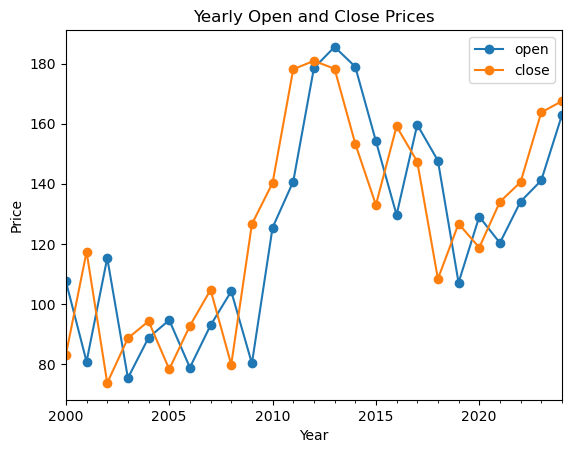

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("IBM.csv")

# Convert 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Down-sample the 'Open' column to yearly periods and calculate its OHLC
yearly_ohlc = df['Open'].resample('Y').ohlc()

# Plot the values for open and close
yearly_ohlc[['open', 'close']].plot(marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Yearly Open and Close Prices')

# Show the plot
plt.show()


# Task 5

Reconsider the `IBM.csv` file containing the IBM stocks values/day.  Consider a window of 1000 days and plot mean values.

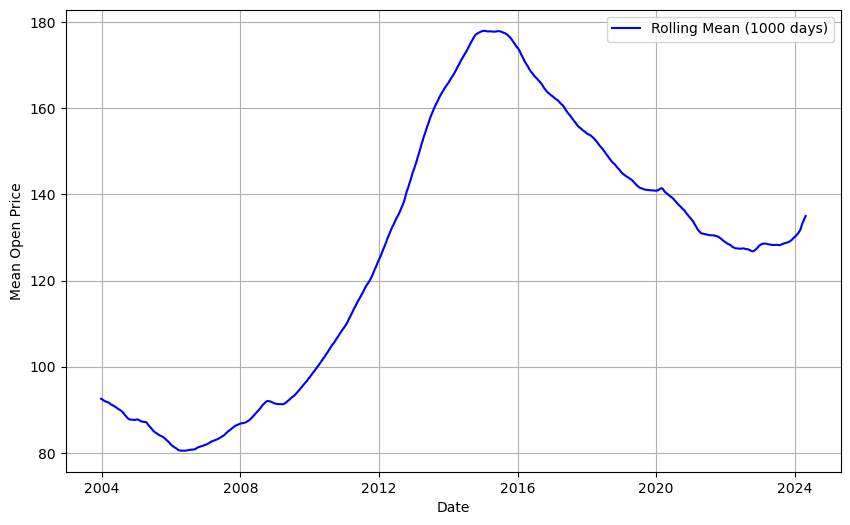

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("IBM.csv")

# Convert 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate the rolling mean over a window of 1000 days
rolling_mean = df['Open'].rolling(window=1000).mean()

# Plot the rolling mean values
plt.figure(figsize=(10, 6))
plt.plot(rolling_mean, color='blue', label='Rolling Mean (1000 days)')
plt.xlabel('Date')
plt.ylabel('Mean Open Price')
plt.legend()
plt.grid(True)
plt.show()


## Task 6

Reconsider the `IBM.csv` file containing the IBM stocks.  Consider a smoothing factor `alpha=0.01`, and plot the `ewm` average for the column `"Open"`, and the actual values in that column.

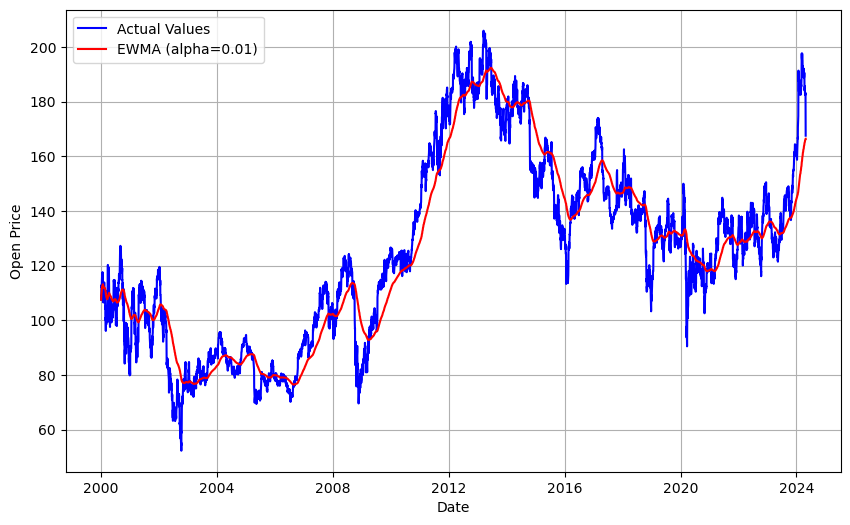

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("IBM.csv")

# Convert 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

alpha = 0.01

# Calculate the exponentially weighted moving average for the "Open" column
ewma = df['Open'].ewm(alpha=alpha).mean()

# Plot the EWMA and actual values in the "Open" column
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Open'], label='Actual Values', color='blue')
plt.plot(df.index, ewma, label=f'EWMA (alpha={alpha})', color='red')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.show()
